In [134]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [135]:
print(pd.__version__)

1.4.1


## Abrir los pickles obtenidos con las siguientes columnas
### Main index - Hace referencia al índice del ejemplo de ese corpus TEST
### Text - Hace referencia a los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### Hipótesis - Hace referencia a los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### R_Text - Hace referencia a los embeddings de los tokens usados para el Texto (Se añade NULL al principio para el procesamiento)
### R_Hip - Hace referencia a los embeddings de los tokens usados para la Hipótesis (Se añade NULL al principio para el procesamiento)
### M_Align - Hace referencia a la matriz de alineamiento de los tokens del Texto y de la Hipótesis 
### Prediction - Hace referencia a la predicción del modelo para ese ejemplo
### Gol_label - Etiqueta correcta del ejemplo
### Idx - Número de ejemplo, el primero es el real y los deḿas son con la hipótesis parafraseada

In [136]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [137]:
carpeta="data/GPT3_salida/"

In [154]:
a=glob.glob(carpeta+'p*.pickle')
a[0]

'data/GPT3_salida/pparaphraseGPT2.csv.pickle'

In [158]:
prueba

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx,predicted_label,gold_label
0,0,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.14382827, 0.03528291, 0.01402...","[0.09497963, 0.77455884, 0.13046147]","[0.0, 1.0, 0.0]",1,67,neutral,neutral
1,1,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[0.30659798, 0.46114457, 0.23225744]","[0.0, 1.0, 0.0]",1,85,neutral,neutral
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.12843...","[0.005668939, 0.2836572, 0.71067387]","[0.0, 0.0, 1.0]",1,186,contradiction,contradiction
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, he{-PRON-,PRON}, is{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.016168319, 0.0352...","[0.43360534, 0.55272824, 0.013666398]","[0.0, 1.0, 0.0]",1,312,neutral,neutral
4,4,"[NULL{null,ADJ}, island{island,NOUN}, native{n...","[NULL{null,PROPN}, they{-PRON-,PRON}, bothmale...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13479285, 0.13707395, 0.24858...","[0.18923545, 0.36034042, 0.45042413]","[0.0, 0.0, 1.0]",1,330,contradiction,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005692, 0.36005315, 0.62094116]","[0.0, 0.0, 1.0]",1,9607,contradiction,contradiction
169,169,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.37810364, 0.39856175, 0.2233346]","[0.0, 1.0, 0.0]",1,9654,neutral,neutral
170,170,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.319975, 0.6742611]","[0.0, 0.0, 1.0]",1,9735,contradiction,contradiction
171,171,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.11239626, 0.101227164, 0.1314...","[0.08208599, 0.27591777, 0.64199626]","[0.0, 0.0, 1.0]",1,9777,contradiction,contradiction


In [160]:
prueba=pd.read_pickle(a[0])
for index,strings in prueba.iterrows():
    if(strings["predicted_label"]!=strings["gold_label"]):
        print(strings["Idx"],strings["predicted_label"],strings["gold_label"])

1138 contradiction neutral
1666 neutral contradiction
2433 entailment neutral
2836 neutral contradiction
3408 neutral contradiction
4832 neutral contradiction
6532 neutral entailment


In [139]:
a[1]

'data/GPT3_salida/pnew_paraphrase.csv.pickle'

In [150]:
dasdas =pd.read_pickle(a[0])
dasdas.to_csv("checkentropia.csv")

In [141]:
stats.zscore([[1,2,3,4],[4,3,2,1]])

array([[-1., -1.,  1.,  1.],
       [ 1.,  1., -1., -1.]])

# Procesamiento de todos los resultados para calcular la entropia de los alineamientos

In [142]:
etiquetas=['entailment','neutral','contradiction']

In [143]:
def entropia_f(X):
    """Devuelve el valor de entropia de una muestra de datos""" 
    probs = [np.mean(X == valor) for valor in set(X)]
    return round(np.sum(-p * np.log2(p) for p in probs), 3)

In [153]:
new_data = {'Docs' : [], 'grupo': [], 'Total' : [], 'Subtotal' : [], 'E_P' : [], 'entropia' : [], 'Paraphrase' : []}
etiquetas=['entailment','neutral','contradiction']
grupo=["GPT2","GPT3"]
i=0
for e in a[:1]:
    df=pd.read_pickle(e)
    df_prediction=df.copy()
    for l1 in etiquetas:
        for l2 in etiquetas:
            new_data['Docs'].append(e)
            new_data['grupo'].append(grupo[i])  
            subtotal=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].shape[0]
            total=df_prediction[df_prediction['gold_label']==l1].shape[0]
            new_data['Total'].append(total)
            new_data['Subtotal'].append(subtotal)
            new_data['E_P'].append(l1+"_"+l2)
            temp=df_prediction[(df_prediction['gold_label']==l1) & (df_prediction['predicted_label']==l2)].copy()
            print(temp)
            l_entropia=[]
            for index,strings in temp.iterrows():
                t=strings[1]
                h=strings[2]
                matriz=strings[5]
                matriz_c=matriz[1:len(t)-1,1:len(h)-1]
                l_entropia.append(entropia_f(stats.zscore(matriz_c.T).flatten()))
            new_data['entropia'].append(np.array(l_entropia[:]))
            new_data['Paraphrase'].append(True)
            l_entropia.clear()
    i+=1
dfn=pd.DataFrame(new_data)

     Main index                                               Text  \
6             6  [NULL{null,ADJ}, several{several,ADJ}, women{w...   
11           11  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, is...   
12           12  [NULL{null,ADJ}, two{two,NUM}, ladies{lady,NOU...   
13           13  [NULL{null,PROPN}, a{a,DET}, tree{tree,NOUN}, ...   
20           20  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...   
25           25  [NULL{null,ADJ}, two{two,NUM}, young{young,ADJ...   
28           28  [NULL{null,ADJ}, first{first,ADJ}, lady{lady,N...   
31           31  [NULL{null,PROPN}, a{a,DET}, classroom{classro...   
33           33  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, we...   
35           35  [NULL{null,ADJ}, six{six,NUM}, men{man,NOUN}, ...   
39           39  [NULL{null,ADJ}, woman{woman,NOUN}, running{ru...   
41           41  [NULL{null,ADJ}, female{female,ADJ}, beach{bea...   
42           42  [NULL{null,ADJ}, right{right,ADJ}, leg{leg,NOU...   
45           45  [NU

/tmp/ipykernel_97265/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_97265/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_97265/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)


     Main index                                               Text  \
0             0  [NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...   
1             1  [NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...   
3             3  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...   
5             5  [NULL{null,ADJ}, people{people,NOUN}, are{be,V...   
7             7  [NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...   
..          ...                                                ...   
155         155  [NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...   
160         160  [NULL{null,ADJ}, army{army,NOUN}, men{man,NOUN...   
166         166  [NULL{null,ADJ}, four{four,NUM}, small{small,A...   
169         169  [NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...   
172         172  [NULL{null,PROPN}, a{a,DET}, older{old,ADJ}, m...   

                                             Hipotesis  \
0    [NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...   
1    [NULL{null,PROPN}, a{a,DET}, pretty{pr

/tmp/ipykernel_97265/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_97265/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)
/tmp/ipykernel_97265/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)


     Main index                                               Text  \
2             2  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...   
4             4  [NULL{null,ADJ}, island{island,NOUN}, native{n...   
9             9  [NULL{null,PROPN}, a{a,DET}, variety{variety,N...   
15           15  [NULL{null,ADJ}, one{one,NUM}, confused{confus...   
18           18  [NULL{null,ADJ}, baby{baby,NOUN}, in{in,ADP}, ...   
21           21  [NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...   
29           29  [NULL{null,ADJ}, bicyclist{bicyclist,NOUN}, ri...   
32           32  [NULL{null,PROPN}, a{a,DET}, young{young,ADJ},...   
34           34  [NULL{null,ADJ}, women{woman,NOUN}, in{in,ADP}...   
38           38  [NULL{null,PROPN}, a{a,DET}, toddler{toddler,N...   
40           40  [NULL{null,ADJ}, boy{boy,NOUN}, with{with,ADP}...   
51           51  [NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...   
52           52  [NULL{null,PROPN}, a{a,DET}, blond{blond,ADJ},...   
53           53  [NU

/tmp/ipykernel_97265/521637173.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return round(np.sum(-p * np.log2(p) for p in probs), 3)


In [146]:
dfn.to_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [147]:
dfn=pd.read_pickle(carpeta+"entropia/resultados_entropiaZSCORE_Transponse.pickle")

In [148]:
dfn

,Docs,grupo,Total,Subtotal,E_P,entropia,Paraphrase
0,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,40,39,entailment_entailment,"[4.644, 6.448, 5.129, 6.511, 6.186, 6.562, 6.7...",True
1,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,40,1,entailment_neutral,[6.538],True
2,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,40,0,entailment_contradiction,[],True
3,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,75,1,neutral_entailment,[2.807],True
4,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,75,73,neutral_neutral,"[4.107, 7.006, 5.122, 6.863, 5.846, 5.003, 4.8...",True
5,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,75,1,neutral_contradiction,[5.929],True
6,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,58,0,contradiction_entailment,[],True
7,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,58,4,contradiction_neutral,"[5.907, 5.447, 7.481, 6.732]",True
8,data/GPT3_salida/pparaphraseGPT2.csv.pickle,GPT2,58,54,contradiction_contradiction,"[7.307, 7.285, 6.003, 6.17, 5.507, 7.2, 6.053,...",True
9,data/GPT3_salida/pnew_paraphrase.csv.pickle,GPT3,40,21,entailment_entailment,"[6.882, 6.359, 6.418, 6.71, 6.97, 5.6, 4.767, ...",True


In [38]:
len(dfn['grupo'].unique())

2

In [39]:
dfn['entropia'][0]

array([4.644, 6.448, 5.129, 6.511, 6.186, 6.562, 6.787, 5.644, 6.168,
       5.728, 5.755, 8.75 , 5.555, 7.226, 5.278, 2.203, 6.122, 6.129,
       6.581, 5.929, 6.34 , 5.968, 4.755, 6.149, 6.607, 6.132, 4.755,
       6.349, 5.393, 7.328, 4.322, 5.74 , 5.79 , 6.092, 5.072, 4.644,
       5.469, 6.507, 3.837])

In [40]:
etiquetas

['entailment', 'neutral', 'contradiction']

In [42]:
labels=[]
for e1 in etiquetas:
    for e2 in etiquetas:
        labels.append(e1+"_"+e2)
labels

['entailment_entailment',
 'entailment_neutral',
 'entailment_contradiction',
 'neutral_entailment',
 'neutral_neutral',
 'neutral_contradiction',
 'contradiction_entailment',
 'contradiction_neutral',
 'contradiction_contradiction']

In [43]:
valores_labels=[]
for el in labels:
    a=dfn[(dfn['E_P']==el)]
    b=a['entropia'].values[0]
    valores_labels.append(b)
valores_labels

[array([4.644, 6.448, 5.129, 6.511, 6.186, 6.562, 6.787, 5.644, 6.168,
        5.728, 5.755, 8.75 , 5.555, 7.226, 5.278, 2.203, 6.122, 6.129,
        6.581, 5.929, 6.34 , 5.968, 4.755, 6.149, 6.607, 6.132, 4.755,
        6.349, 5.393, 7.328, 4.322, 5.74 , 5.79 , 6.092, 5.072, 4.644,
        5.469, 6.507, 3.837]),
 array([6.538]),
 array([], dtype=float64),
 array([2.807]),
 array([4.107, 7.006, 5.122, 6.863, 5.846, 5.003, 4.837, 6.644, 5.585,
        5.272, 5.64 , 4.766, 5.38 , 4.907, 6.068, 5.977, 5.961, 7.042,
        7.019, 6.   , 6.107, 5.807, 5.272, 1.485, 7.571, 6.654, 5.781,
        4.863, 5.349, 5.349, 6.823, 6.588, 5.   , 5.874, 6.692, 6.969,
        3.045, 5.991, 4.444, 6.507, 6.225, 6.469, 5.17 , 6.492, 6.168,
        6.392, 6.615, 5.75 , 5.875, 6.17 , 6.295, 6.508, 5.522, 6.742,
        5.278, 6.936, 6.919, 5.393, 6.216, 5.   , 5.6  , 6.162, 6.585,
        5.755, 6.838, 5.449, 4.322, 6.239, 5.644, 6.585, 7.568, 6.444,
        6.199]),
 array([5.929]),
 array([], dtype=float

In [44]:
len(valores_labels)

9

([<matplotlib.axis.XTick at 0x7f7d152e5eb0>,
 [Text(0, 0, 'entailment_entailment'),
  Text(1, 0, 'entailment_neutral'),
  Text(2, 0, 'entailment_contradiction'),
  Text(3, 0, 'neutral_entailment'),
  Text(4, 0, 'neutral_neutral'),
  Text(5, 0, 'neutral_contradiction'),
  Text(6, 0, 'contradiction_entailment'),
  Text(7, 0, 'contradiction_neutral'),
  Text(8, 0, 'contradiction_contradiction')])

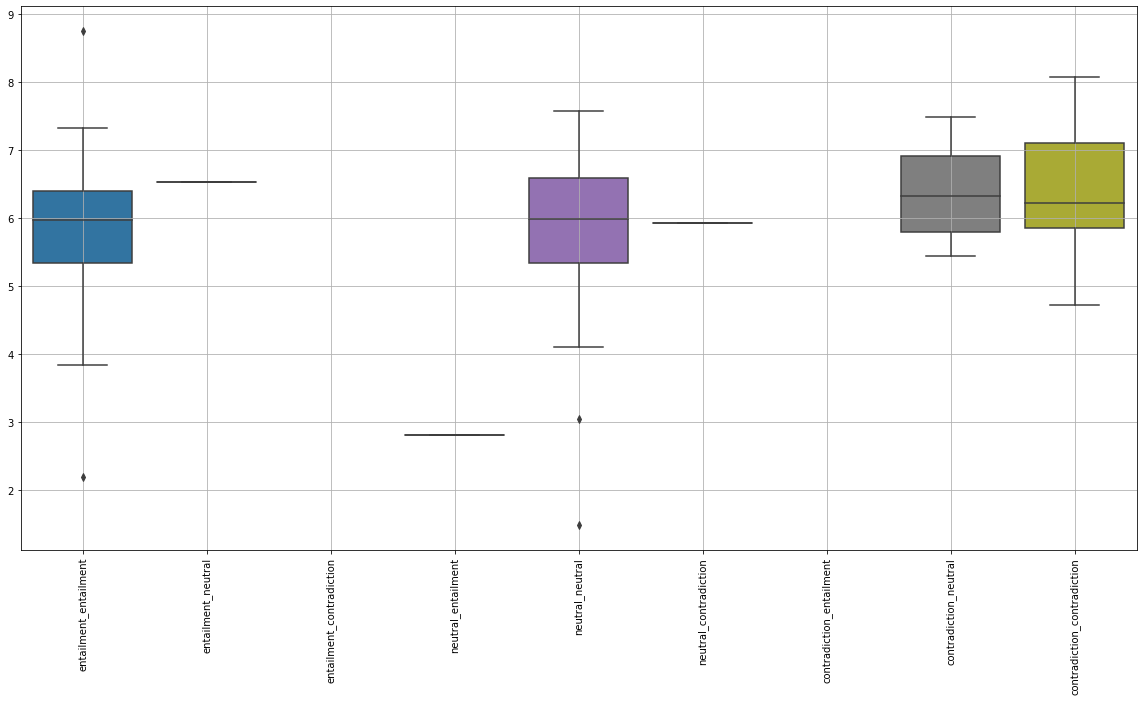

In [45]:
fig2 = plt.figure(figsize=(20,10))
sns.boxplot(data=valores_labels)
plt.grid()
plt.xticks(range(9),labels,rotation=90)

# Procesamiento para generar boxplot por muestreos

In [46]:
l_grupos=dfn.grupo.unique()
labels_g=[]
datos_g=[]
grupo_g=[]
for lg in l_grupos:
    for lab in labels:
        l_mean_entropia=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==0)]
        for index,strings in temp.iterrows():
            l_mean_entropia.append(np.nanmean(strings['entropia']))
        labels_g.append(lab)
        datos_g.append(l_mean_entropia[:])
        l_mean_entropia.clear()
        grupo_g.append(lg)

In [47]:
l_grupos

array(['GPT2', 'GPT3'], dtype=object)

In [109]:
l_grupos_p=dfn.grupo.unique()
labels_g_p=[]
datos_g_p=[]
grupo_g_p=[]
muestreo=[]
g=["GPT2","GPT3"]
i=0
for lg in l_grupos_p:
    for lab in labels:
        l_mean_entropia_p=[]
        temp=dfn[(dfn['grupo']==lg) & (dfn['E_P']==lab) & (dfn['Paraphrase']==1)]
        for index,strings in temp.iterrows():
            mean=np.nanmean(strings['entropia'])
        labels_g_p.append(lab)
        datos_g_p.append(mean)
        l_mean_entropia_p.clear()
        grupo_g_p.append(lg)
        muestreo.append(g[i])
    i+=1

/tmp/ipykernel_97265/851018540.py:13: RuntimeWarning: Mean of empty slice
  mean=np.nanmean(strings['entropia'])


In [111]:
muestreo

['GPT2',
 'GPT2',
 'GPT2',
 'GPT2',
 'GPT2',
 'GPT2',
 'GPT2',
 'GPT2',
 'GPT2',
 'GPT3',
 'GPT3',
 'GPT3',
 'GPT3',
 'GPT3',
 'GPT3',
 'GPT3',
 'GPT3',
 'GPT3']

In [112]:
datosGPT=pd.DataFrame([datos_g_p,labels_g_p,muestreo],index=["values","labels","grupo"])
datosGPT=datosGPT.T

In [113]:
datosGPT

,values,labels,grupo
0,5.809846,entailment_entailment,GPT2
1,6.538,entailment_neutral,GPT2
2,NaN,entailment_contradiction,GPT2
3,2.807,neutral_entailment,GPT2
4,5.873164,neutral_neutral,GPT2
5,5.929,neutral_contradiction,GPT2
6,NaN,contradiction_entailment,GPT2
7,6.39175,contradiction_neutral,GPT2
8,6.395389,contradiction_contradiction,GPT2
9,6.141667,entailment_entailment,GPT3


<AxesSubplot:xlabel='labels', ylabel='values'>

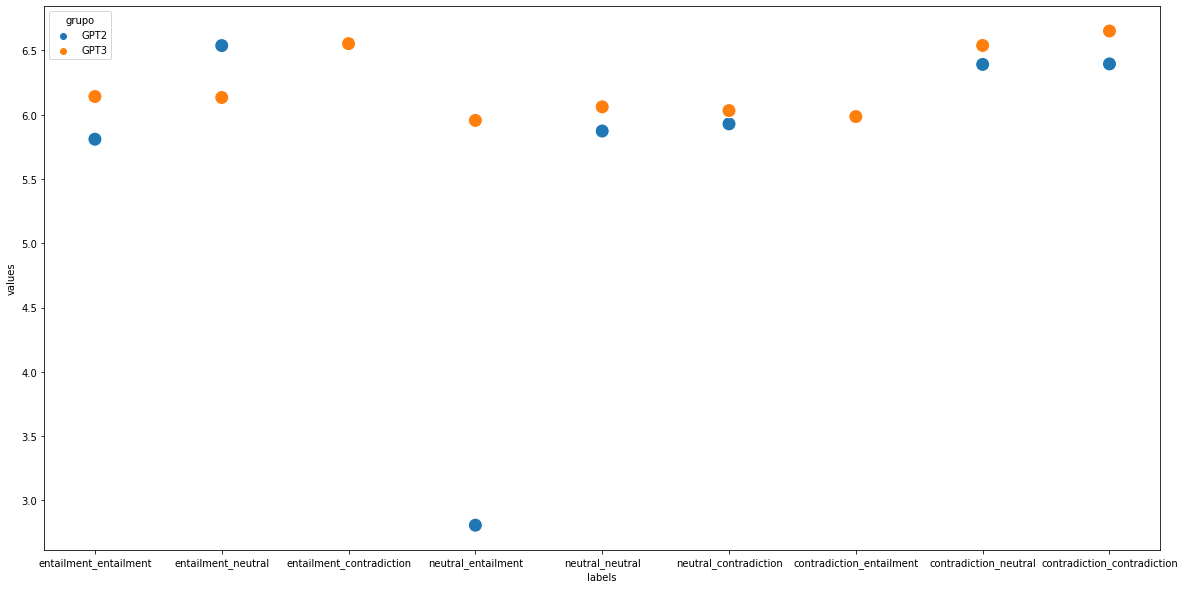

In [133]:
fig2 = plt.figure(figsize=(20,10))
#ax = fig2.add_axes([-1,1,1,1])
#ax.tick_params(labelsize=10)
#ax.grid(visible=True)
sns.scatterplot(data=datosGPT,x="labels",y="values",hue="grupo",s=200)
#ax.set_xticklabels(labels_g_p,fontsize=20,rotation=90)
#plt.title("MEAN entropy grupo GPT2 vs GPT3",fontsize=30)

[Text(0, 0, 'entailment_entailment'),
 Text(1, 0, 'entailment_neutral'),
 Text(2, 0, 'entailment_contradiction'),
 Text(3, 0, 'neutral_entailment'),
 Text(4, 0, 'neutral_neutral'),
 Text(5, 0, 'neutral_contradiction'),
 Text(6, 0, 'contradiction_entailment'),
 Text(7, 0, 'contradiction_neutral'),
 Text(8, 0, 'contradiction_contradiction')]

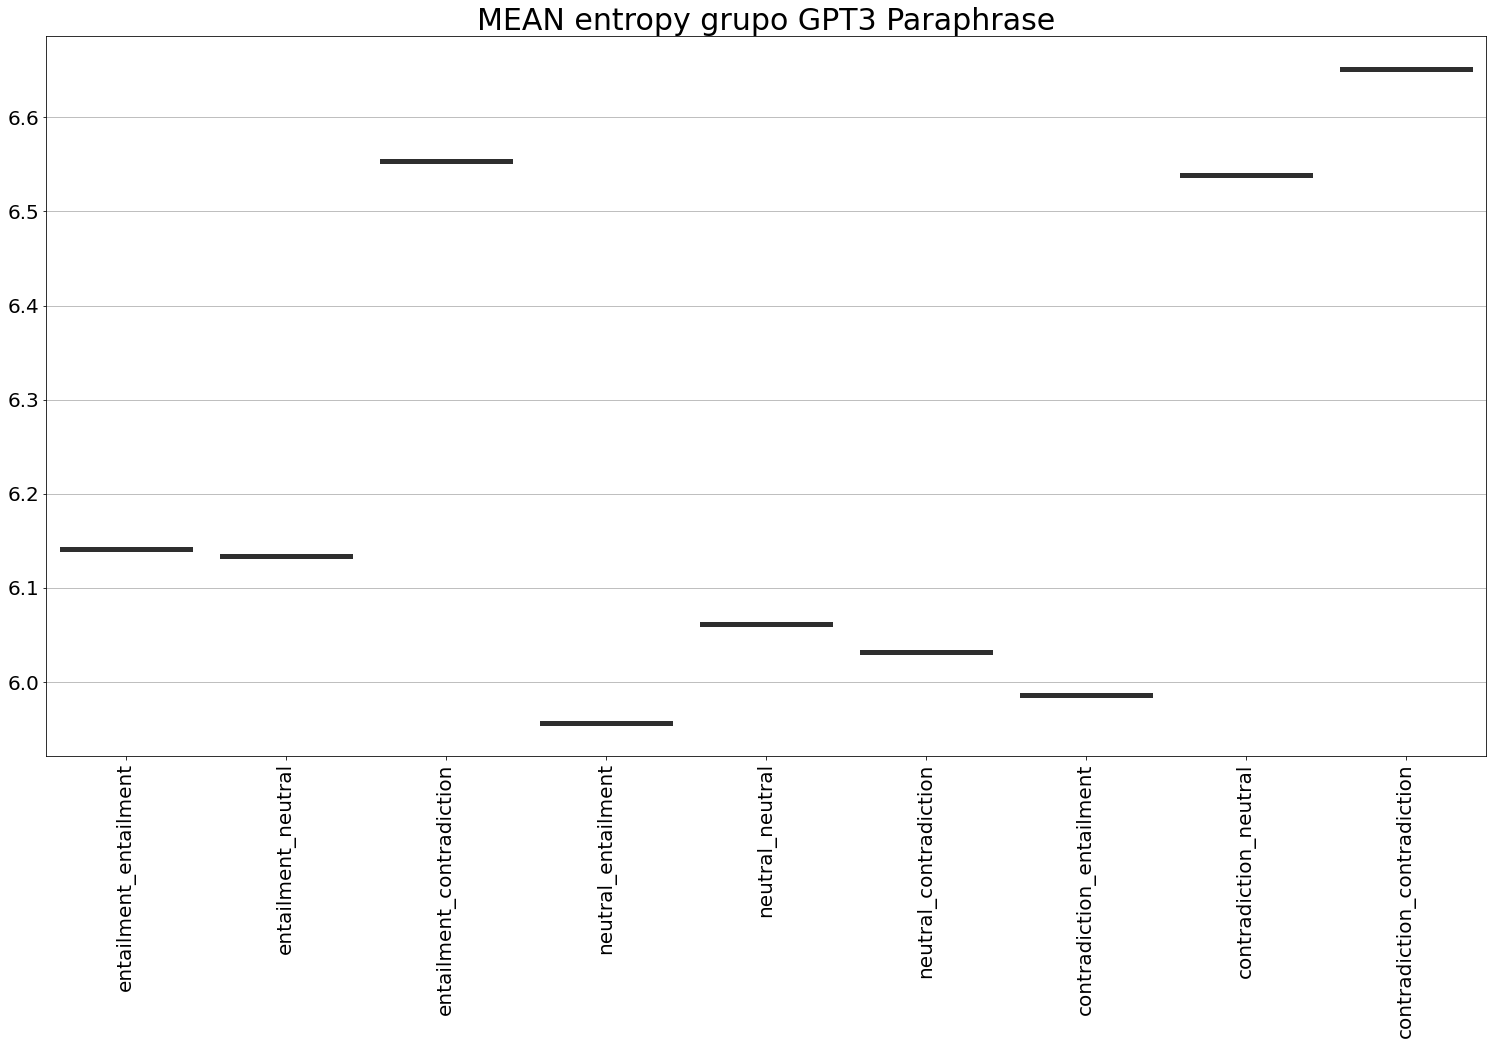

In [61]:
fig2 = plt.figure(figsize=(20,10))
ax = fig2.add_axes([-1,1,1,1])
ax.tick_params(labelsize=20)
ax.grid(visible=True)
plt.title("MEAN entropy grupo GPT3 Paraphrase",fontsize=30)
bp0 = sns.boxplot(data=datos_g_p[9:18],linewidth=5,palette="Blues")
ax.set_xticklabels(labels_g_p[9:18],fontsize=20,rotation=90)
